In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# 生成城市地图
np.random.seed(0)  # 保证每次运行生成的随机城市地图相同
City_Map = 100 * np.random.rand(20, 2)

In [0]:
# 计算两城市间的距离
def distance(city1, city2):
    return np.sqrt(np.sum((city1 - city2)**2))

In [0]:
# 计算路径长度
def path_length(path, City_Map):
    length = 0
    for i in range(len(path) - 1):
        length += distance(City_Map[path[i]], City_Map[path[i+1]])
    length += distance(City_Map[path[-1]], City_Map[path[0]])  # 回到起点
    return length

In [0]:
# 初始化种群
def initialize_population(size):
    population = [np.random.permutation(20) for _ in range(size)]
    return np.array(population)

In [0]:
# 选择（轮盘赌选择）
def selection(population, City_Map):
    fitness = np.array([1/path_length(p, City_Map) for p in population])
    prob = fitness / np.sum(fitness)
    indices = np.arange(len(population))
    selected_idx = np.random.choice(indices, size=len(population), p=prob)
    return population[selected_idx]

In [0]:
# 交叉（部分映射交叉PMX）
def crossover(parent1, parent2):
    size = len(parent1)
    idx1, idx2 = sorted(np.random.choice(np.arange(size), size=2, replace=False))
    child1 = np.zeros(size, dtype=int)
    child2 = np.zeros(size, dtype=int)
    child1[idx1:idx2] = parent1[idx1:idx2]
    child2[idx1:idx2] = parent2[idx1:idx2]
    
    for i in range(size):
        if i < idx1 or i >= idx2:
            child1[i] = parent2[i]
            child2[i] = parent1[i]
            while child1[i] in child1[idx1:idx2]:
                child1[i] = parent2[np.where(parent1 == child1[i])[0][0]]
            while child2[i] in child2[idx1:idx2]:
                child2[i] = parent1[np.where(parent2 == child2[i])[0][0]]
                
    return child1, child2

In [0]:
# 变异（交换变异）
def mutate(path):
    idx1, idx2 = np.random.choice(np.arange(len(path)), size=2, replace=False)
    path[idx1], path[idx2] = path[idx2], path[idx1]
    return path

In [0]:
# 遗传算法主流程
def genetic_algorithm(City_Map, pop_size=100, gen_num=100, mut_rate=0.1):
    population = initialize_population(pop_size)
    best_path = min(population, key=lambda x: path_length(x, City_Map))
    best_length = path_length(best_path, City_Map)
    
    for gen in range(gen_num):
        new_population = []
        
        # 选择
        population = selection(population, City_Map)
        
        # 交叉
        for i in range(pop_size // 2):
            parent1, parent2 = population[np.random.choice(pop_size, size=2, replace=False)]
            child1, child2 = crossover(parent1, parent2)
            new_population.append(child1)
            new_population.append(child2)
            
        population = np.array(new_population)
        
        # 变异
        for i in range(pop_size):
            if np.random.rand() < mut_rate:
                population[i] = mutate(population[i])
        
        # 更新最佳路径
        current_best_path = min(population, key=lambda x: path_length(x, City_Map))
        current_best_length = path_length(current_best_path, City_Map)
        if current_best_length < best_length:
            best_path, best_length = current_best_path, current_best_length
        
    return best_path, best_length

In [7]:
# 运行遗传算法
best_path, best_length = genetic_algorithm(City_Map, gen_num=500)

# 输出结果
best_path, best_length

(array([ 5,  3, 15,  2,  0, 18,  1, 14,  7, 17,  8, 12, 16, 11, 13,  6, 10,
        19,  9,  4]),
 581.727706204704)

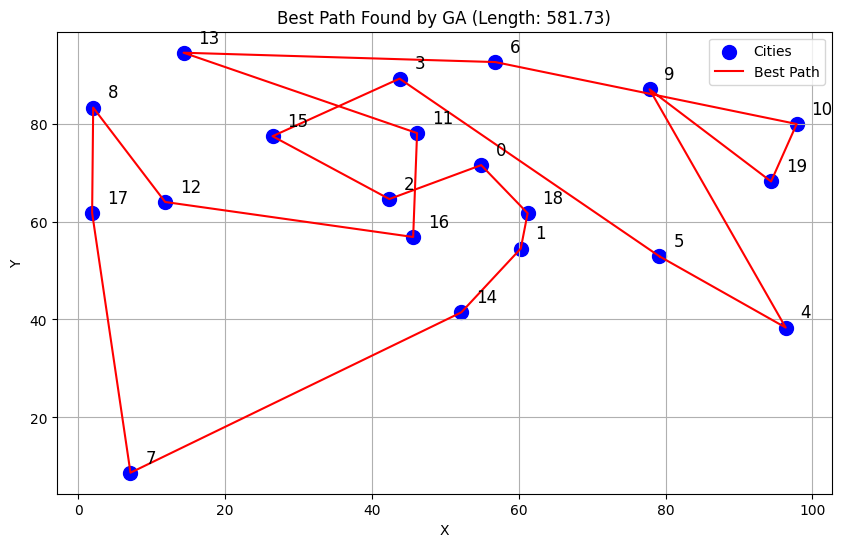

In [8]:
# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(City_Map[:, 0], City_Map[:, 1], s=100, c='blue', label='Cities')
plt.plot(np.append(City_Map[best_path, 0], City_Map[best_path[0], 0]), 
         np.append(City_Map[best_path, 1], City_Map[best_path[0], 1]), 
         c='red', label='Best Path')
for i, city in enumerate(City_Map):
    plt.annotate(str(i), (city[0]+2, city[1]+2), fontsize=12)

plt.title(f'Best Path Found by GA (Length: {best_length:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
